In [3]:
# Cloning REPO
!git clone https://github.com/kishkath/CIFAR10.git

Cloning into 'CIFAR10'...
remote: Enumerating objects: 108, done.
remote: Counting objects: 100% (108/108), done.
remote: Compressing objects: 100% (79/79), done.
remote: Total 108 (delta 55), reused 66 (delta 25), pack-reused 0
Receiving objects: 100% (108/108), 21.44 KiB | 3.57 MiB/s, done.
Resolving deltas: 100% (55/55), done.


In [4]:
# Lets get files from stored directory
import sys
sys.path.append("/kaggle/working/CIFAR10/")

In [1]:
!pip install pytorch-gradcam

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 25.2 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
  Created wheel for pytorch-gradcam: filename=pytorch_gradcam-0.2.1-py3-none-any.whl size=5269 sha256=cd0df2c46e7888b802e07de7ee9743884a650b9d283b64ca3869b1c68ada6416
  Stored in directory: /root/.cache/pip/wheels/06/e7/da/b13a71980c3a787414e5ff8e156701c561c6322636396d71cc
Successfully built pytorch-gradcam


In [2]:
!pip install torchsummary

#### A. Importing Libraries

In [5]:
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from colorama import Fore,Style
import matplotlib.pyplot as plt
# python pip Libraries


from models import * 
from main import Performance,scores
from torchsummary import summary
from utils import mis_prediction,plotting_gradCams,loader
from utils import class_accuracy,Plot_curves,Draw
# user defined libraries:
# models has resnet model.
# main.py has things related to training & testing accuracies,
  ## scores returns train_acc,loss,test_acc,loss
# utils.py contain dataloading substance(loader)
  ## Plotting train-test performances and mis-classifications
  ## Plotting GRAD-CAM, deriving class wise accuracy, 
  ## getting mis-classifying list to verify if we need

==> Preparing data..
==> Getting model..
==> Its Training!


#### B. Dataloading & Data Augmentation

In [6]:
trainloader,testloader = loader.load_data()

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [7]:
## CIFAR10
classes = ('plane', 'car', 'bird', 'cat','deer', 'dog', 'frog', 'horse', 'ship', 'truck')

#### C. Visualizations 

  * Configurable number of images to plot

Plotting 21 test images!
0.cat 1.ship 2.ship 3.plane 4.frog 5.frog 6.car 7.frog 8.cat 9.car 10.plane 11.truck 12.dog 13.horse 14.truck 15.ship 16.dog 17.horse 18.ship 19.frog 20.horse


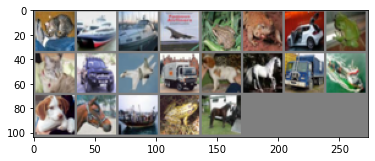

In [8]:
#  Let us plot some random testing images, as many images we need 
# count(plotting of image count) should be less than BATCH_SIZE
plot_num_images = 21
print(Style.BRIGHT+Fore.GREEN+f"Plotting {plot_num_images-1} test images!")
dataiter = next(iter(testloader))
image_set , labels = dataiter

print(' '.join(str(j)+"."+'%1s' % classes[labels[j]] for j in range(plot_num_images)))
Draw.plotings(torchvision.utils.make_grid(image_set[:plot_num_images]))

Plotting Train Images!
car truck truck truck ship horse ship frog plane plane horse bird car plane frog car dog plane plane truck cat


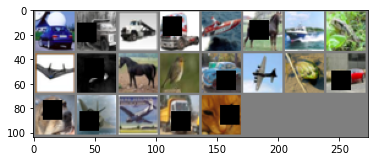

In [9]:
print(Style.BRIGHT+Fore.YELLOW+'Plotting Train Images!')
# get some random training images
dataiter = next(iter(trainloader))
image_set , labels = dataiter
print(' '.join('%1s' % classes[labels[j]] for j in range(plot_num_images)))
Draw.plotings(torchvision.utils.make_grid(image_set[:plot_num_images]))

#### D. Model Building

In [10]:
# !pip install torchsummary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = resnet.ResNet18().to(device)
summary(model,input_size=(3,32,32))
print(device)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1, 128,

#### E. Performance and Evaluation

In [11]:
model = ResNet18().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
EPOCHS = 20
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    Performance().train(model,device, trainloader, optimizer, epoch,criterion)
    Performance().test(model,device, testloader,epoch,criterion)

EPOCH: 0


Loss=1.19916832447052 Batch_id=390 train-Accuracy=47.35: 100%|██████████| 391/391 [00:44<00:00,  8.77it/s]  



Test set: Average loss: 0.0090, val-Accuracy: 5825/10000 (58.25%)

Saving..
EPOCH: 1


Loss=0.7361292243003845 Batch_id=390 train-Accuracy=66.50: 100%|██████████| 391/391 [00:43<00:00,  9.02it/s]



Test set: Average loss: 0.0068, val-Accuracy: 6933/10000 (69.33%)

Saving..
EPOCH: 2


Loss=0.7759369015693665 Batch_id=390 train-Accuracy=74.09: 100%|██████████| 391/391 [00:44<00:00,  8.81it/s] 



Test set: Average loss: 0.0069, val-Accuracy: 7149/10000 (71.49%)

Saving..
EPOCH: 3


Loss=0.6280006170272827 Batch_id=390 train-Accuracy=78.97: 100%|██████████| 391/391 [00:44<00:00,  8.82it/s] 



Test set: Average loss: 0.0053, val-Accuracy: 7721/10000 (77.21%)

Saving..
EPOCH: 4


Loss=0.5655038356781006 Batch_id=390 train-Accuracy=82.28: 100%|██████████| 391/391 [00:45<00:00,  8.63it/s] 



Test set: Average loss: 0.0049, val-Accuracy: 8003/10000 (80.03%)

Saving..
EPOCH: 5


Loss=0.4215312898159027 Batch_id=390 train-Accuracy=85.09: 100%|██████████| 391/391 [00:44<00:00,  8.74it/s] 



Test set: Average loss: 0.0052, val-Accuracy: 7968/10000 (79.68%)

EPOCH: 6


Loss=0.42325180768966675 Batch_id=390 train-Accuracy=87.36: 100%|██████████| 391/391 [00:44<00:00,  8.72it/s]



Test set: Average loss: 0.0055, val-Accuracy: 7994/10000 (79.94%)

EPOCH: 7


Loss=0.2540341019630432 Batch_id=390 train-Accuracy=89.60: 100%|██████████| 391/391 [00:44<00:00,  8.73it/s] 



Test set: Average loss: 0.0056, val-Accuracy: 8006/10000 (80.06%)

Saving..
EPOCH: 8


Loss=0.33418187499046326 Batch_id=390 train-Accuracy=90.97: 100%|██████████| 391/391 [00:44<00:00,  8.76it/s]



Test set: Average loss: 0.0064, val-Accuracy: 7719/10000 (77.19%)

EPOCH: 9


Loss=0.33396461606025696 Batch_id=390 train-Accuracy=92.26: 100%|██████████| 391/391 [00:44<00:00,  8.72it/s]



Test set: Average loss: 0.0058, val-Accuracy: 8118/10000 (81.18%)

Saving..
EPOCH: 10


Loss=0.23778191208839417 Batch_id=390 train-Accuracy=93.60: 100%|██████████| 391/391 [00:44<00:00,  8.69it/s]



Test set: Average loss: 0.0061, val-Accuracy: 8119/10000 (81.19%)

Saving..
EPOCH: 11


Loss=0.10489501059055328 Batch_id=390 train-Accuracy=93.97: 100%|██████████| 391/391 [00:44<00:00,  8.71it/s]



Test set: Average loss: 0.0056, val-Accuracy: 8220/10000 (82.20%)

Saving..
EPOCH: 12


Loss=0.08759395778179169 Batch_id=390 train-Accuracy=94.55: 100%|██████████| 391/391 [00:44<00:00,  8.76it/s] 



Test set: Average loss: 0.0061, val-Accuracy: 8115/10000 (81.15%)

EPOCH: 13


Loss=0.1627112776041031 Batch_id=390 train-Accuracy=94.95: 100%|██████████| 391/391 [00:44<00:00,  8.74it/s]  



Test set: Average loss: 0.0055, val-Accuracy: 8217/10000 (82.17%)

EPOCH: 14


Loss=0.1716381460428238 Batch_id=390 train-Accuracy=95.56: 100%|██████████| 391/391 [00:44<00:00,  8.73it/s]  



Test set: Average loss: 0.0066, val-Accuracy: 8066/10000 (80.66%)

EPOCH: 15


Loss=0.06268329918384552 Batch_id=390 train-Accuracy=95.86: 100%|██████████| 391/391 [00:44<00:00,  8.75it/s] 



Test set: Average loss: 0.0066, val-Accuracy: 8128/10000 (81.28%)

EPOCH: 16


Loss=0.1126096099615097 Batch_id=390 train-Accuracy=96.23: 100%|██████████| 391/391 [00:45<00:00,  8.68it/s]  



Test set: Average loss: 0.0062, val-Accuracy: 8225/10000 (82.25%)

Saving..
EPOCH: 17


Loss=0.11494461447000504 Batch_id=390 train-Accuracy=96.41: 100%|██████████| 391/391 [00:44<00:00,  8.73it/s] 



Test set: Average loss: 0.0061, val-Accuracy: 8265/10000 (82.65%)

Saving..
EPOCH: 18


Loss=0.12074756622314453 Batch_id=390 train-Accuracy=96.51: 100%|██████████| 391/391 [00:44<00:00,  8.72it/s] 



Test set: Average loss: 0.0081, val-Accuracy: 7952/10000 (79.52%)

EPOCH: 19


Loss=0.34115737676620483 Batch_id=390 train-Accuracy=96.82: 100%|██████████| 391/391 [00:44<00:00,  8.72it/s] 



Test set: Average loss: 0.0059, val-Accuracy: 8300/10000 (83.00%)

Saving..


#### F. Plots performances, mis-classified, GRADCAMS

                              MISCLASSIFIED IMAGES                              




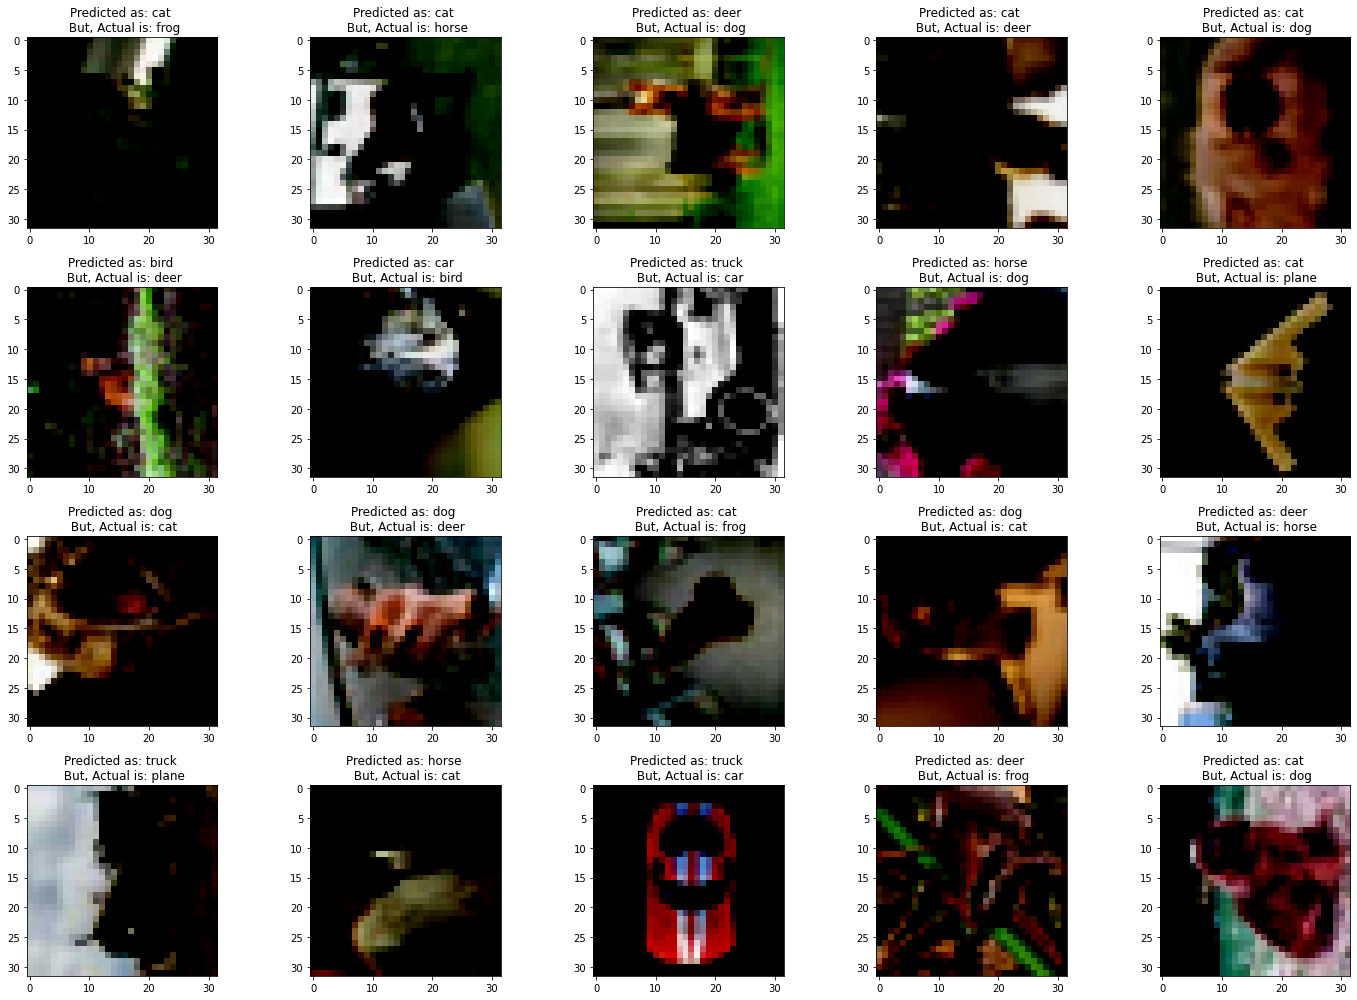

In [13]:
print(" "*30+Style.BRIGHT+Fore.BLACK+"MISCLASSIFIED IMAGES"+" "*30)
print("\n")
# If you want n number of images to plot just pass the number as third parameter:
# like: mis_classsified(model,testloader,7,default is 10
Plot_curves.mis_classified(model,testloader,20)

array([[<AxesSubplot:title={'center':'Training Loss'}>,
        <AxesSubplot:title={'center':'Test Loss'}>],
       [<AxesSubplot:title={'center':'Training Accuracy'}>,
        <AxesSubplot:title={'center':'Test Accuracy'}>]], dtype=object)

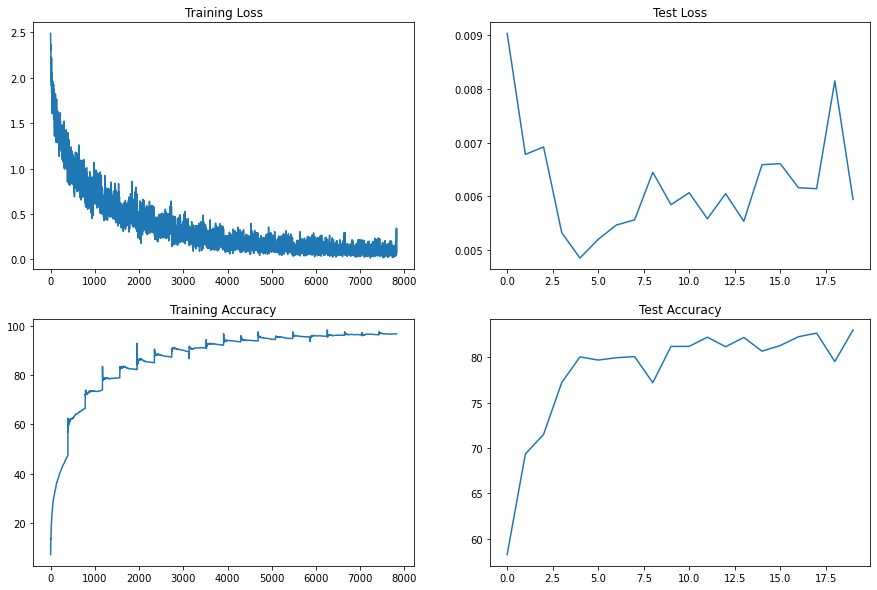

In [12]:
## Performance scores
train_acc,train_losses,test_acc,test_losses = scores()
Plot_curves().performance_curves(train_acc,test_acc,train_losses,test_losses)

                    GRAD-CAM usable diagnosistic IMAGES                    
Diagnosis is happening for Layer2 of ResNet18. Lets go!


Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

/opt/conda/lib/python3.7/site-packages/torch/nn/modules/module.py:1033: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "
/opt/conda/lib/python3.7/site-packages/torch/nn/functional.py:3704: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


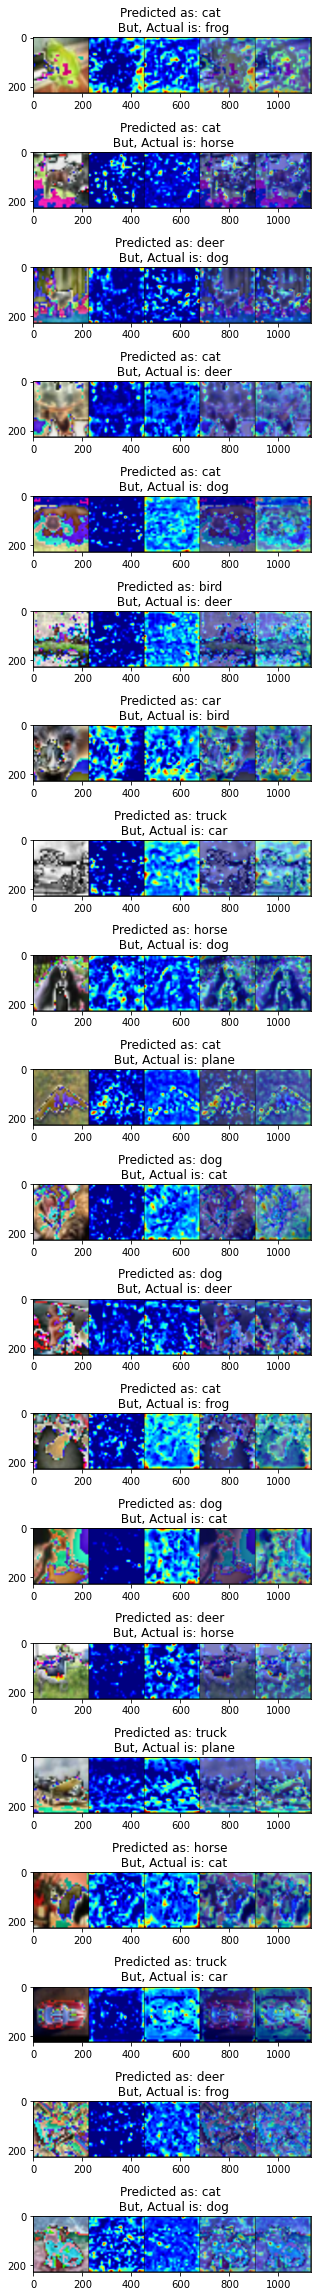

In [14]:
## Can plots any number of images less than stored mis-classifed Images
print(" "*20+Style.BRIGHT+Fore.BLACK+"GRAD-CAM usable diagnosistic IMAGES"+" "*20)
plotting_gradCams(20)

In [ ]:
print(Style.BRIGHT+Fore.CYAN+"Done!")